In [1]:
#from tensorflow.python.summary.summary_iterator import summary_iterator
#import tensorflow as tf

from plotting_utils import *
# import os
# import matplotlib
# import numpy as np
# import matplotlib.pyplot as plt


# def get_fields(file_location):
#     fields = {}
#     try:
#         for summary in summary_iterator(file_location):
#             for v in summary.summary.value:
#                 if v.tag not in fields:
#                     fields[v.tag] = []
#                 fields[v.tag].append(v.simple_value)
#     except:
#         return fields
#     return fields


# def moving_average_filter(data, span_N):
#     data_cpy = data[:]
#     for i,d in enumerate(data):
#         span_n = span_N
#         while (i < span_n or ((len(data)-1)-i) < span_n) and span_n >= 1:
#            span_n -= 1
#         curr_avrg = d
#         for cntr in range(1, (span_n+1)):
#             curr_avrg += data[i+cntr]
#             curr_avrg += data[i-cntr]
#         data_cpy[i] = curr_avrg / (2*span_n + 1)
#     return data_cpy

# def get_events_paths(base_folder, remove_duplicates = True):
#     '''Return dict of {exp_name: event_file_path} '''
#     experiments = {}
#     tfeventstr = "events.out.tfevents"
#     for root, dirs, file in os.walk(base_folder, topdown=False):
#         for f in file:
#             if tfeventstr in f:
#                 name = root.split('/')[-1]
#                 if remove_duplicates and 'N' in name:
#                     hldr = name.split('_')[-1]
#                     num = int(hldr[1:])
#                     if num > 0:
#                         continue
#                 experiments[name] = os.path.join(root, f)
#     return experiments
    
# def get_event_data(base_folder, remove_duplicates = True):
#     '''Return {exp_name: dict_of_fields} '''
#     experiments = get_events_paths(base_folder, remove_duplicates)
#     for k,v in experiments.items():
#         experiments[k] = get_fields(v)
#     return experiments


# def filter(data, filter_terms):
#     filter_data = {}
#     for k,v in data.items():
#         flag = True
#         for term in filter_terms:
#             if not term in k:
#                 flag = False
#         if flag:
#             filter_data[k] = v
#     return filter_data

# def plot(ax, data, field, plot_term, smooth = None):
#     '''data is already in filtered form
#     data: {name:list of data_points} '''
#     lookup = set()
#     exclude_last_points = 1
#     for k, v in data.items():
#         if plot_term in k:
#             exp_id = k.split("_")
#             ind = exp_id.index(plot_term)
#             plot_term_value = exp_id[ind+1]
#             if not plot_term_value in lookup:
#                 lookup.add(plot_term_value)
#                 label = plot_term + ' = ' + plot_term_value
#                 if not smooth is None:
#                     new_data = moving_average_filter(v[field], smooth)
#                     exclude_last_points = smooth + 1
#                 else:
#                     new_data = v[field][:]
#                 x = np.arange(len(new_data))
#                 ax.plot(x[:-exclude_last_points], new_data[:-exclude_last_points], label = label)

In [ ]:
def plot(ax, data, field, plot_term, params, smooth = None):
    '''data is already in filtered form
    data: {name:list of data_points} '''
    def last(a):
        return a[-1]

    all_plots = []
    lookup = set()
    exclude_last_points = 1
    for k, v in data.items():
        if plot_term in k:
            exp_id = k.split("_")
            ind = exp_id.index(plot_term)
            plot_term_value = exp_id[ind+1]
            if not plot_term_value in lookup:
                lookup.add(plot_term_value)
                label = params["aliasplotterm"] + ' = ' + plot_term_value
                if not smooth is None:
                    new_data = moving_average_filter(v[field], smooth)
                    exclude_last_points = smooth + 1
                else:
                    new_data = v[field][:]
                x = np.arange(len(new_data))
                ax.plot(x[5:-exclude_last_points], new_data[5:-exclude_last_points], label = label)
                #all_plots.append((handle,label, float(plot_term_value)))
    
    handles, labels = ax.get_legend_handles_labels()
    label_id = [float(l.split(" = ")[-1]) for l in labels]
    all_plots = [tuple(i) for i in zip(handles, labels, label_id)]
    all_plots.sort(key = last, reverse=True)


   # print(handles, labels)
    ax.set_xlabel(params["xlabel"])  # Add an x-label to the axes.
    ax.set_ylabel(params["ylabel"])  # Add a y-label to the axes.
    ax.set_title(params["title"])  # Add a title to the axes.
  #  handles = [p[0] for p in all_plots]
  #  lbls = [p[1] for p in all_plots]
    h,l,_ = zip(*all_plots)
    ax.legend(h, l)  # Add a legend.


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


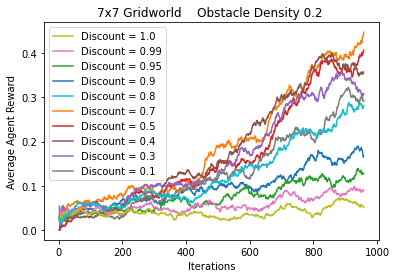

In [2]:
file = '/home/james/Desktop/Gridworld/test/test2'

fig, ax = plt.subplots()

all_data = get_event_data(file)

filter_terms = ["envsize_7"]
field = "agent_dones"
plot_term = "disc"
params = {"title": "7x7 Gridworld    Obstacle Density 0.2 ",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Discount"}

data = filter(all_data, filter_terms)
plot(ax, data, field, plot_term, params, smooth=40)

#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.
plt.show()

In [3]:
#make_path("test/test2.png")
#fig.savefig(make_exist("test3/test.png"))

# Hello world $\gamma$